# Machine Learning - Titanic Deaths : SVM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

In [6]:
titanic_file = pd.read_csv("titanic.csv")
titanic_file = titanic_file[titanic_file[['Sex','Fare',"Pclass", "SibSp",
                                          "Age"]].notnull().all(1)]
titanic_file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [106]:
X = titanic_file.drop(columns=["Survived","Name","Ticket","PassengerId","Embarked","Cabin",
                               "Parch"])
y = titanic_file["Survived"]
le_sex = LabelEncoder()
X["Sex_n"] = le_sex.fit_transform(X["Sex"])
X = X.drop(columns=["Sex"])
X_training, X_testing, y_training, y_testing = train_test_split(X,y,test_size=0.25)
model = svm.SVC()
model.fit(X_training, y_training)
prediction = model.predict(X_testing)
score = accuracy_score(prediction, y_testing)
score

0.6536312849162011

<AxesSubplot:xlabel='Age', ylabel='Fare'>

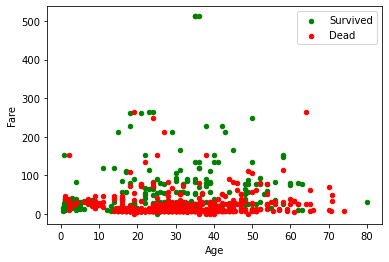

In [107]:
survived = titanic_file [titanic_file ['Survived'] == 1]
dead = titanic_file [titanic_file ['Survived'] == 0]

axes = survived.plot(kind = 'scatter', x = 'Age', y = 'Fare', color = 'green', label = 'Survived')
dead.plot(kind = 'scatter', x = 'Age', y = 'Fare', color = 'red', label = 'Dead', ax = axes)

In [108]:
joblib.dump(model, "SVM_Titanic_Deaths.joblib")

['SVM_Titanic_Deaths.joblib']